<a href="https://colab.research.google.com/github/fatememosleh222/Big-Data-Machine-Learning/blob/Master/MachineLearning_CRWK_CN7030_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning on Big Data (CN7030) CRWK 23-24 Term B [60% weighting]**
# **Group ID: [Your Group ID]**
1.   Student 1: Name and ID
2.   Student 2: Name and ID
3.   Student 3: Name and ID

---

If you want to add comments on your group work, please write it here for us:


# **Initiate and Configure Spark**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=3ff0d6ca73162a3d9a43d6892d66ebfd57e7097ec8bf7aaee02afd3c06c13fd4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb #visualize data


In [ ]:
conf=SparkConf()
conf.set("spark.app.name", "CourseWork_Machin_Learning")
conf.set("spark.master", "local[*]")
conf.set("spark.driver.memory", "4g")
conf.set("spark.executor.memory", "8g")
conf.set("spark.driver.cores", 1)
conf.set("spark.executor.cores", 2)


# Check if there is an existing SparkContext
if 'sc' in locals():
  # Stop the existing SparkContext
  sc.stop()

sc = SparkContext(conf = conf)

spark= SparkSession.builder.appName("CourseWork_Machin_Learning").config("spark.some.config.option", "config-value").getOrCreate()

#Import Libraries and basic setup#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="drive/My Drive/MachinelearningDataset/Base.csv"
path2="drive/My Drive/MachinelearningDataset/Variant I.csv"

---
# **Task 1 - Data Loading and Preprocessing (15 marks)**
---

##Reading File and Preprocessing##

Dataset that I used in here is a Bank Fraud dataset that is chosen from kaggle website
this is a link of dataset in kaggle website
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

the reasons that I've chosen this dataset is about intresting data about bank account fraud. This dataset released in 2022 and the size of data is around 535mb.
It has 32 columns in a dataset .

In [ ]:
#Reading  csv file
df = spark.read.csv(path, header=True, inferSchema=True)

# # Read second CSV file
# df2 = spark.read.csv(path2, header=True, inferSchema=True)

# # Merge the DataFrames
# df = df1.union(df2)


# df = spark.read.csv(path,
#                              inferSchema=True,
#                              header=True)

In [ ]:
# df.show(7)
# df.count()

+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+-----------------+------------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+
|fraud_bool|            income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|       velocity_6h|     velocity_24h|       velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status|credit_risk_score|email_is_free|housing_status|phone_home_valid|phone_mobile_valid|bank_months_

1000000

###showing null values and remove them from dataset##

In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+-----------+------------+-----------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+------+-------------------------+---------+------------------+-------------------------+------------------+-----+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|velocity_6h|velocity_24h|velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status|credit_risk_score|email_is_free|housing_status|phone_home_valid|phone_mobile_valid|bank_months_count|has_other_cards|proposed_credit_limit|foreign_request|sour

In [ ]:
# Drop rows contain NaN values
#df = df.na.drop()

##casting column types to the correct type integer or double ##

In [ ]:
from pyspark.sql import functions as F

customizedf = df.\
    withColumn('fraud_bools', F.col('fraud_bool').cast('string')).\
    withColumn('fraud_bool', F.col('fraud_bool').cast('integer')).\
    withColumn('income', F.col('income').cast('double')).\
    withColumn('name_email_similarity', F.col('name_email_similarity').cast('double')).\
    withColumn('prev_address_months_count', F.col('prev_address_months_count').cast('integer')).\
    withColumn('current_address_months_count', F.col('current_address_months_count').cast('integer')).\
    withColumn('customer_age', F.col('customer_age').cast('integer')).\
    withColumn('days_since_request', F.col('days_since_request').cast('double')).\
    withColumn('intended_balcon_amount', F.col('intended_balcon_amount').cast('double')).\
    withColumn('zip_count_4w', F.col('zip_count_4w').cast('integer')).\
    withColumn('velocity_6h', F.col('velocity_6h').cast('double')).\
    withColumn('velocity_4w', F.col('velocity_4w').cast('double')).\
    withColumn('intended_balcon_amount', F.col('intended_balcon_amount').cast('integer')).\
    withColumn('bank_branch_count_8w', F.col('bank_branch_count_8w').cast('integer')).\
    withColumn('date_of_birth_distinct_emails_4w', F.col('date_of_birth_distinct_emails_4w').cast('integer')).\
    withColumn('credit_risk_score', F.col('credit_risk_score').cast('integer')).\
    withColumn('email_is_free', F.col('email_is_free').cast('integer')).\
    withColumn('phone_home_valid', F.col('phone_home_valid').cast('integer')).\
    withColumn('bank_months_count', F.col('bank_months_count').cast('integer')).\
    withColumn('has_other_cards', F.col('has_other_cards').cast('integer')).\
    withColumn('proposed_credit_limit', F.col('proposed_credit_limit').cast('integer')).\
    withColumn('foreign_request', F.col('foreign_request').cast('integer')).\
    withColumn('session_length_in_minutes', F.col('session_length_in_minutes').cast('double')).\
    withColumn('keep_alive_session', F.col('session_length_in_minutes').cast('integer')).\
    withColumn('device_distinct_emails_8w', F.col('device_distinct_emails_8w').cast('integer')).\
    withColumn('device_fraud_count', F.col('device_fraud_count').cast('integer')).\
    withColumn('month', F.col('month').cast('integer')).\
    drop('timestamp')


# customizedf.show()

In [ ]:
customizedf = customizedf.na.drop()

###drop irrelevant data from dataset###

In [ ]:
# from pyspark.sql import functions as F
# from pyspark.sql.types import StringType

# # Now you can use StringType in your code

# # Get the list of numerical column names excluding "device_fraud_count"
# numerical_columns = [col_name for col_name, col_type in customizedf.dtypes if col_type != 'string' and col_type != StringType() and col_name != 'device_fraud_count']

# # Filter out rows with null values in numerical columns
# customizedf = customizedf.dropna(subset=numerical_columns)

# # Calculate mean and standard deviation for each numerical column
# mean_std_df = customizedf.select(*[
#     F.mean(col).alias(f'{col}_mean') for col in numerical_columns
# ] + [
#     F.stddev(col).alias(f'{col}_std') for col in numerical_columns
# ])

# # Join mean and standard deviation with original DataFrame
# df_with_stats = customizedf.crossJoin(mean_std_df)

# # Calculate Z-scores for each numerical column except "device_fraud_count"
# z_score_cols = [
#     ((F.col(col) - F.col(f'{col}_mean')) / F.col(f'{col}_std')).alias(f'{col}_zscore')
#     for col in numerical_columns
# ]

# z_score_df = df_with_stats.select('*', *z_score_cols)

# # Calculate overall Z-score as square root of sum of squared Z-scores
# z_score_df = z_score_df.withColumn('overall_zscore',
#                                    F.sqrt(sum(F.col(f'{col}_zscore')**2 for col in numerical_columns)))

# # Define threshold for outliers (e.g., 3 standard deviations)
# threshold = 3

# # Filter out rows with overall Z-score greater than threshold
# filtered_df = z_score_df.filter(F.col('overall_zscore').isNotNull() & (F.col('overall_zscore') <= threshold))

# # Drop additional columns used for calculation
# filtered_df = filtered_df.drop(*[f'{col}_mean' for col in numerical_columns])
# filtered_df = filtered_df.drop(*[f'{col}_std' for col in numerical_columns])
# filtered_df = filtered_df.drop(*[f'{col}_zscore' for col in numerical_columns])

# # Now 'filtered_df' contains the PySpark DataFrame with outliers removed and "device_fraud_count" excluded from Z-score calculation


In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.types import StringType
# Assuming 'customizedf' is your DataFrame and 'fraud_bool' contains the categories
numerical_columns = [col_name for col_name, col_type in customizedf.dtypes
                     if col_type != 'string' and col_type != StringType() and col_name != 'device_fraud_count']

# Calculate mean and standard deviation for each numerical column within each category
window_spec = Window.partitionBy('fraud_bool')
mean_std_df = customizedf.select('fraud_bool', *[
    F.mean(col).over(window_spec).alias(f'{col}_mean') for col in numerical_columns
] + [
    F.stddev(col).over(window_spec).alias(f'{col}_std') for col in numerical_columns])

# Join mean and standard deviation with the original DataFrame
df_with_stats = customizedf.join(mean_std_df, on='fraud_bool', how='inner')

# Calculate Z-scores for each numerical column except "device_fraud_count" within each category
z_score_cols = [
    ((F.col(col) - F.col(f'{col}_mean')) / F.col(f'{col}_std')).alias(f'{col}_zscore')
    for col in numerical_columns
]

# Add Z-score columns to the DataFrame
z_score_df = df_with_stats.select('*', *z_score_cols)

# Calculate overall Z-score as square root of sum of squared Z-scores within each category
z_score_df = z_score_df.withColumn('overall_zscore',
                                   F.sqrt(sum(F.col(f'{col}_zscore')**2 for col in numerical_columns)))

# Define threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Filter out rows with overall Z-score greater than threshold within each category
filtered_df = z_score_df.filter(F.col('overall_zscore').isNotNull() & (F.col('overall_zscore') <= threshold))

# Drop additional columns used for calculation
columns_to_drop = [f'{col}_mean' for col in numerical_columns] + \
                  [f'{col}_std' for col in numerical_columns] + \
                  [f'{col}_zscore' for col in numerical_columns] + \
                  ['overall_zscore']
filtered_df = filtered_df.drop(*columns_to_drop)

# Now 'filtered_df' contains the PySpark DataFrame with outliers removed within each category


###Sample Data 1000 records ###

In [ ]:
# # Assuming you have a DataFrame called filtered_df
# # You can use the sample method to randomly sample 1000 rows from the DataFrame

# sampled_df = filtered_df.sample(withReplacement=False, fraction=1000/filtered_df.count(), seed=42)

# # Check the count of the sampled DataFrame
# print(f"Sampled DataFrame has {sampled_df.count()} rows.")


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# Assuming you have a DataFrame called filtered_df
# You can use the sample method to randomly sample 1000 rows from the DataFrame

sampled_df = filtered_df.sample(withReplacement=False, fraction=0.001, seed=42)

# Check the count of the sampled DataFrame
# print(f"Sampled DataFrame has {sampled_df.count()} rows.")


In [ ]:
dfd = sampled_df.take(1).toPandas()
print(f"Sampled DataFrame has {len(dfd)} rows.")


In [ ]:
sampled_df.show()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# fraud_count_df = filtered_df.groupBy("fraud_bool").count()

# # Show the result
# fraud_count_df.show()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# print('fitlerdcount: ',filtered_df.count())
# print('z_score_df: ',z_score_df.count())
# print('customizedcount: ',customizedf.count())

In [ ]:
filtered_df.cache()


In [ ]:
from pyspark.sql.functions import col


major_df_count = filtered_df.filter(col("fraud_bool") == 0).count()
minor_df_count = filtered_df.filter(col("fraud_bool") == 1).count()
print("major_df_count: {}".format(major_df_count))
print("minor_df_count: {}".format(minor_df_count))

In [ ]:
# # Assuming you have a DataFrame called "filtered_df" and you want to drop the column "device_fraud_count"
# filtered_df = filtered_df.drop("device_fraud_count")

# customizedf=filtered_df


In [ ]:
#  filtered_df.show(2)

In [ ]:
# # Display the first 10 rows of the DataFrame
# for row in z_score_df.take(10):
#     print(row)


In [ ]:
# z_score_df.head()

In [ ]:
from pyspark.sql.functions import col
filtered_df.filter(col("fraud_bool") == 0).show()
filtered_df.filter(col("fraud_bool") == 1).show()

##depicting some features chart about dataset in a preprocessing part ##

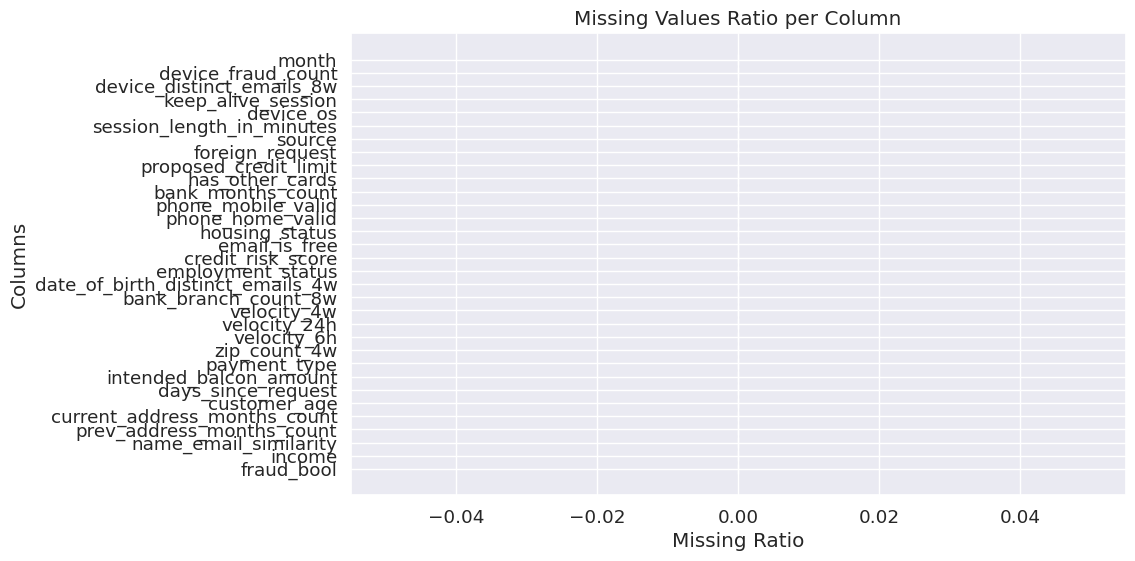

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Calculate the number of missing values per column
missing_counts = df.agg(*[(F.count(F.when(F.isnull(c), c)) / F.count('*')).alias(c) for c in df.columns])

# Convert the result to Pandas DataFrame for visualization
missing_counts_pd = missing_counts.toPandas().transpose()
missing_counts_pd.columns = ['missing_ratio']

# Plot missing values
plt.figure(figsize=(10, 6))
plt.barh(missing_counts_pd.index, missing_counts_pd['missing_ratio'], color='skyblue')
plt.xlabel('Missing Ratio')
plt.ylabel('Columns')
plt.title('Missing Values Ratio per Column')
plt.show()


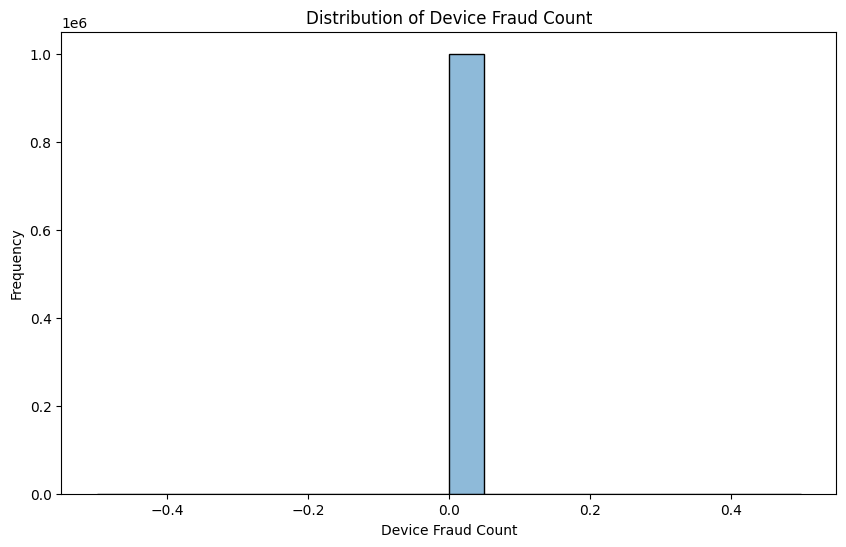

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# Convert the PySpark DataFrame column to a pandas Series for plotting
device_fraud_count_values = df.select("device_fraud_count").toPandas()["device_fraud_count"]

# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(device_fraud_count_values, bins=20, kde=True)
plt.title("Distribution of Device Fraud Count")
plt.xlabel("Device Fraud Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.figure(figsize=(18, 15))
cor = df.corr()
mask = np.triu(np.ones_like(cor))
heatmap = sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")  # Set fmt to ".2f" to display 2 decimals
plt.show()

Pie chart for fraud boolean distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.types import StructType, IntegerType, StringType
from pyspark.sql.functions import col


# Group by the 'fraud_bool' column and depict count occurrences
fraud_countsg = filtered_df.groupBy("fraud_bool").count()
fraud_countsg.show()

label_map = {"0": "Non-fraud", "1": "Fraud"}
# Convert the 'fraud_bool' column to string
fraud_countsg = fraud_countsg.withColumn("fraud_bool", col("fraud_bool").cast(StringType()))

fraud_countsg = fraud_countsg.replace(to_replace=label_map, subset=["fraud_bool"])
# Create a pie chart
fraud_countsg_pandas = fraud_countsg.toPandas()
plt.figure(figsize=(6, 6))
plt.pie(fraud_countsg_pandas["count"], labels=fraud_countsg_pandas["fraud_bool"], autopct="%1.1f%%", startangle=90)
plt.title("Fraud Distribution")
plt.show()





ModuleNotFoundError: No module named 'pyspark'

###analyzing data###

In [ ]:
num_income = customizedf.select("income").count()

# Count the number of distinct userIds and distinct movieIds
num_payment_type = customizedf.select("payment_type").distinct().count()
num_source = customizedf.select("source").distinct().count()
num_device_os = customizedf.select("device_os").distinct().count()
num_customer_age = customizedf.select("customer_age").distinct().count()

In [ ]:
print('num_income=',num_income)
print('num_payment_type=',num_payment_type)
print('num_source=',num_source)
print('num_device_os=',num_device_os)
print('num_customer_age=',num_customer_age)

num_income= 1000000
num_payment_type= 5
num_source= 2
num_device_os= 5
num_customer_age= 9


In [ ]:
# Group data by income, count ratings
groupby_income = customizedf.groupBy("income").count().orderBy('count', ascending=False)
groupby_income.show()


groupby_employment_status = customizedf.groupBy("employment_status").count().orderBy('count', ascending=False)
groupby_employment_status.show()


groupby_phone_mobile_valid = customizedf.groupBy("phone_mobile_valid").count().orderBy('count', ascending=False)
groupby_phone_mobile_valid.show()


groupby_device_os = customizedf.groupBy("device_os").count().orderBy('count', ascending=False)
groupby_device_os.show()

+------------------+------+
|            income| count|
+------------------+------+
|               0.9|221419|
|               0.1|157449|
|               0.8|146650|
|0.6000000000000001|111973|
|0.7000000000000001|105109|
|               0.4| 81364|
|               0.2| 69345|
|               0.5| 55858|
|               0.3| 50833|
+------------------+------+

+-----------------+------+
|employment_status| count|
+-----------------+------+
|               CA|730252|
|               CB|138288|
|               CF| 44034|
|               CC| 37758|
|               CD| 26522|
|               CE| 22693|
|               CG|   453|
+-----------------+------+

+------------------+------+
|phone_mobile_valid| count|
+------------------+------+
|                 1|889676|
|                 0|110324|
+------------------+------+

+---------+------+
|device_os| count|
+---------+------+
|    other|342728|
|    linux|332712|
|  windows|263506|
|macintosh| 53826|
|      x11|  7228|
+---------+-----

I used two ways to show the missing data but both ways show zero missing data

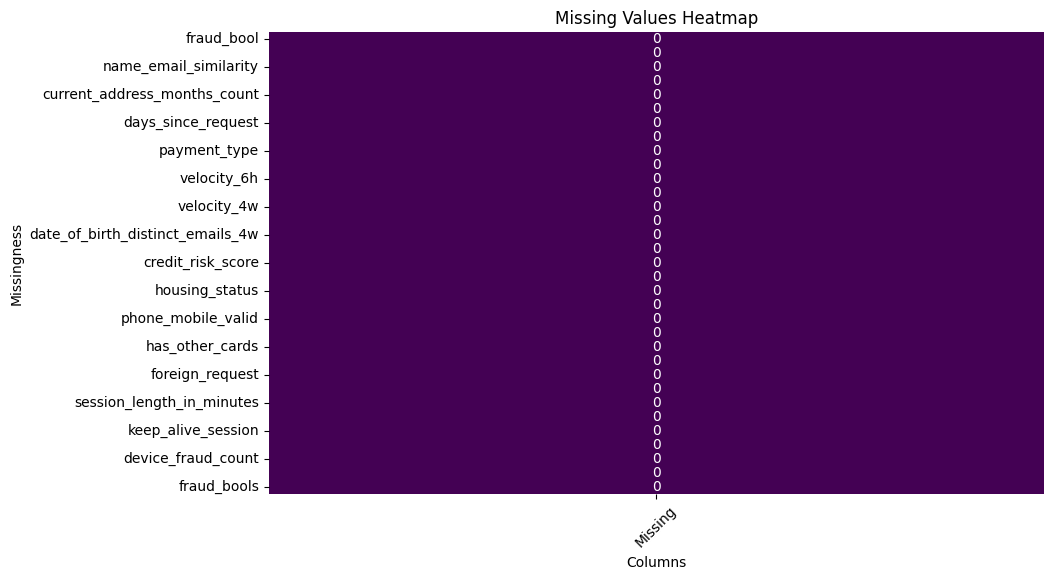

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F

# Calculate the number of missing values in each column
missing_counts = df.agg(*[
    (1 - (F.count(c) / F.count('*'))).alias(c) for c in customizedf.columns
])

# Convert the result to Pandas DataFrame for visualization
missing_df = missing_counts.toPandas().transpose()
missing_df.columns = ['Missing']

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_df, cmap='viridis', cbar=False, annot=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Missingness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

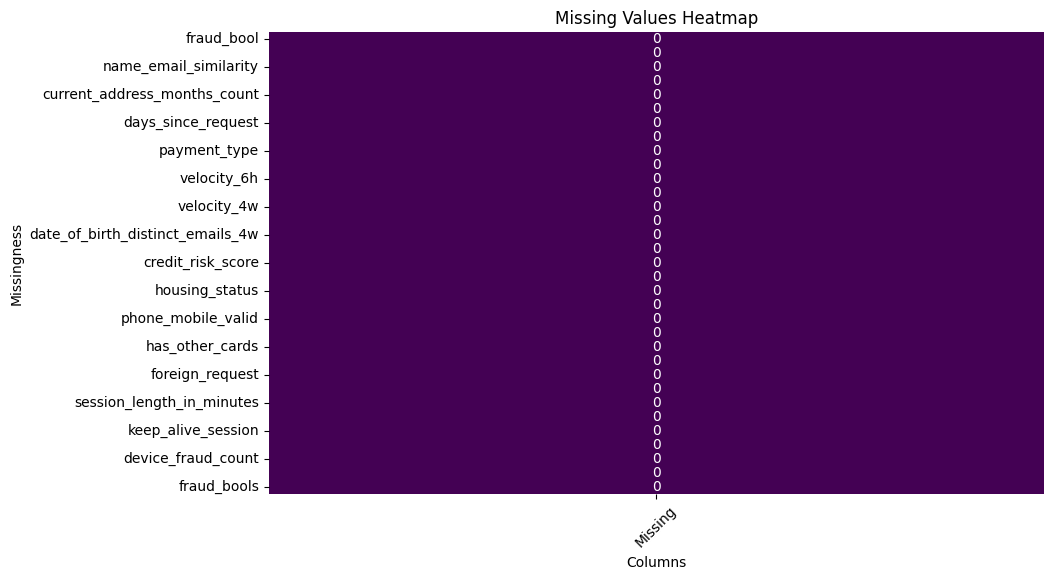

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F

# Calculate the number of missing values in each column
missing_counts = df.agg(*[
    (F.sum(F.col(c).isNull().cast("int")).alias(c)) for c in customizedf.columns
])

# Convert the result to Pandas DataFrame for visualization
missing_df = missing_counts.toPandas().transpose()
missing_df.columns = ['Missing']

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_df, cmap='viridis', cbar=False, annot=True, fmt='g')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Missingness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()





###HeatMap of features and highest correlated features###




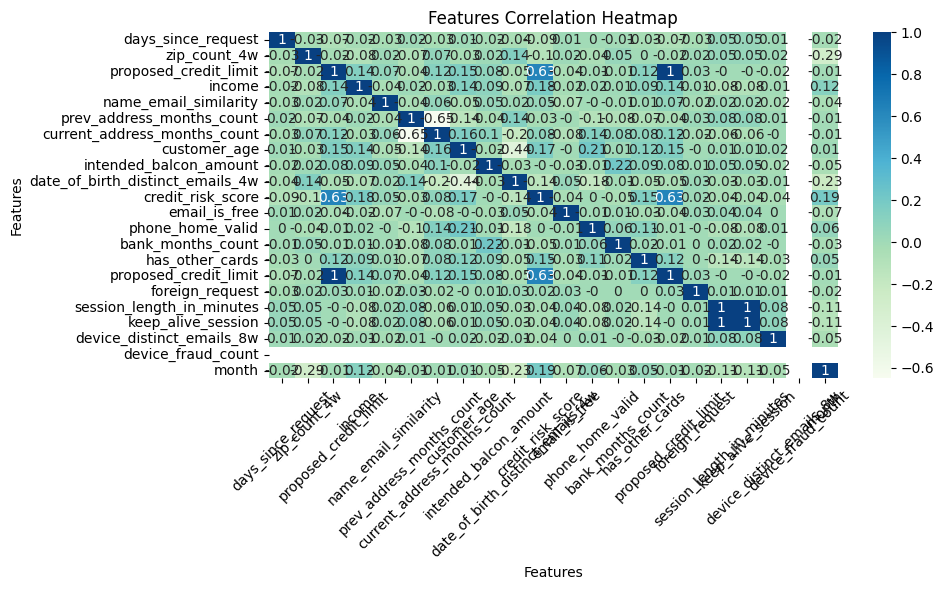

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F




# Define numerical features
numerical_features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit','income','name_email_similarity'
                      ,'prev_address_months_count','current_address_months_count','customer_age','intended_balcon_amount'
                      ,'date_of_birth_distinct_emails_4w','credit_risk_score','email_is_free','phone_home_valid',
                      'bank_months_count','has_other_cards','proposed_credit_limit','foreign_request'
                      ,'session_length_in_minutes','keep_alive_session','device_distinct_emails_8w','device_fraud_count'
                      ,'month'
                      ]

# Calculate Spearman correlation matrix
correlation_matrix = customizedf.select(numerical_features).toPandas().corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(round(correlation_matrix, 2), annot=True, cmap='GnBu')
plt.title('Features Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


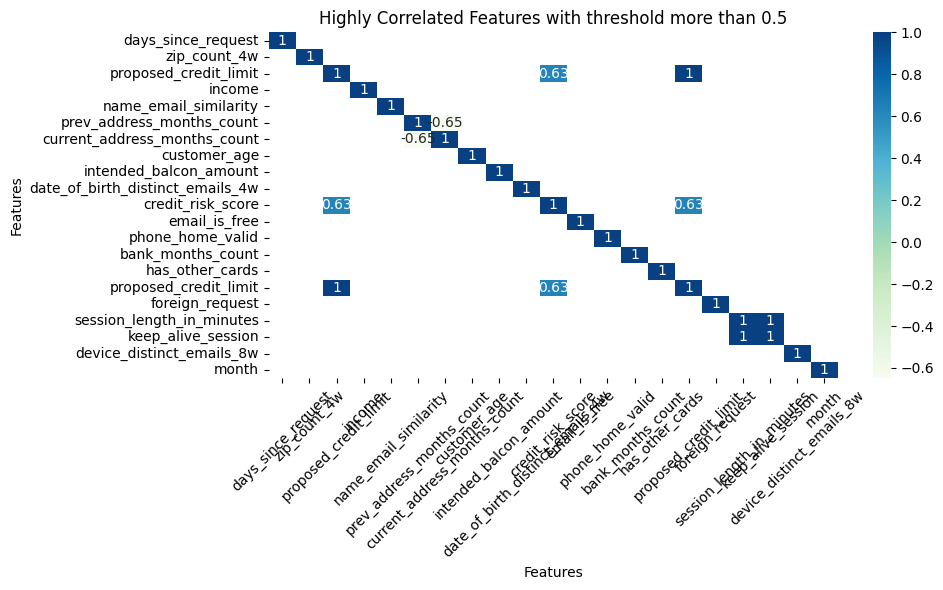

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F

# Define numerical features
numerical_features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit', 'income', 'name_email_similarity',
                      'prev_address_months_count', 'current_address_months_count', 'customer_age', 'intended_balcon_amount',
                      'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid',
                      'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request',
                      'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
                      'month'
                      ]

# Calculate Spearman correlation matrix
correlation_matrix = customizedf.select(numerical_features).toPandas().corr(method='spearman')

# Filter features with correlation above a certain threshold (e.g., 0.5)
threshold = 0.5
highly_correlated_features = correlation_matrix[correlation_matrix.abs() > threshold]
highly_correlated_features = highly_correlated_features.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Plot the heatmap for highly correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(round(highly_correlated_features, 2), annot=True, cmap='GnBu')
plt.title('Highly Correlated Features with threshold more than 0.5')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


##adding some new features  ##

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the function to categorize_income
@udf(StringType())
def categorize_basedonincome(income):
    # Your logic to categorize income into groups goes here
    # For example:
    if income < 30000:
        return 'Low'
    elif income < 60000:
        return 'Medium'
    else:
        return 'High'

# Apply the categorize_income UDF to create the "income_group" column
customizedf = customizedf.withColumn('income_group', categorize_basedonincome(customizedf['income']))

# Change the data type of the "income_group" column to category
customizedf = customizedf.withColumn('income_group', customizedf['income_group'].cast(StringType()))

# Show the DataFrame with the new "income_group" column
# customizedf.show()

In [ ]:
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt

# Define the  ranges
ranges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Use the when function instead of if to categorize the data
# Use the otherwise to handle other values that are out of range
customizedf = customizedf.withColumn('similarity_range',
                                     when((col('name_email_similarity') >= ranges[0]) & (col('name_email_similarity') < ranges[1]), '[0.0, 0.1)')
                                     .when((col('name_email_similarity') >= ranges[1]) & (col('name_email_similarity') < ranges[2]), '[0.1, 0.2)')
                                     .when((col('name_email_similarity') >= ranges[2]) & (col('name_email_similarity') < ranges[3]), '[0.2, 0.3)')
                                     .when((col('name_email_similarity') >= ranges[3]) & (col('name_email_similarity') < ranges[4]), '[0.3, 0.4)')
                                     .when((col('name_email_similarity') >= ranges[4]) & (col('name_email_similarity') < ranges[5]), '[0.4, 0.5)')
                                     .when((col('name_email_similarity') >= ranges[5]) & (col('name_email_similarity') < ranges[6]), '[0.5, 0.6)')
                                     .when((col('name_email_similarity') >= ranges[6]) & (col('name_email_similarity') < ranges[7]), '[0.6, 0.7)')
                                     .when((col('name_email_similarity') >= ranges[7]) & (col('name_email_similarity') < ranges[8]), '[0.7, 0.8)')
                                     .when((col('name_email_similarity') >= ranges[8]) & (col('name_email_similarity') < ranges[9]), '[0.8, 0.9)')
                                     .when((col('name_email_similarity') >= ranges[9]) & (col('name_email_similarity') <= ranges[10]), '[0.9, 1.0]')
                                     .otherwise('Out of range'))

# Count the number of data points in each range
range_counts = customizedf.groupBy('similarity_range').count().orderBy('similarity_range')

# Extract the bin labels for the x-axis
bin_labels = [row.similarity_range for row in range_counts.collect()]

# Extract the counts for the y-axis
counts = [row['count'] for row in range_counts.collect()]

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(bin_labels, counts, marker='o', linestyle='-')
plt.xlabel('Name Email Similarity Ranges')
plt.ylabel('Number of  Points')
plt.title('Distribution of Name Email Similarities')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)

# Show the plot
plt.show()

###Normalize the range with round function###

In [ ]:
from pyspark.sql.functions import round

# Normalize the values in the "name_email_similarity" column to three decimal places
customizedf = customizedf.withColumn('name_email_similarity', round('name_email_similarity', 3))

# Sow the first 10 rows
#customizedf.show(10)


In [ ]:
# Aggregate the counts of customers by age
age_counts = customizedf.groupBy('customer_age').count().orderBy('customer_age')

# Extract the age values and count values for plotting
ages = [row.customer_age for row in age_counts.collect()]
counts = [row['count'] for row in age_counts.collect()]

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(ages, counts, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age')

# Add text labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col, when
import numpy as np

# Replace negative values in the 'intended_balcon_amount' column with null (NaN)
customizedf = customizedf.withColumn('intended_balcon_amount', when(col('intended_balcon_amount') < 0, None).otherwise(col('intended_balcon_amount')))

# Round the values in the 'intended_balcon_amount' column to two decimal places
customizedf = customizedf.withColumn('intended_balcon_amount', round('intended_balcon_amount', 2))

# Show the first 10 rows
customizedf.show(10)

In [ ]:
import seaborn as sns
credit_risk_scores = customizedf.select('credit_risk_score').toPandas()

# Create the KDE plot using seaborn
sns.kdeplot(credit_risk_scores['credit_risk_score'], color='blue', fill=True)
plt.xlabel('Credit Risk Score')
plt.ylabel('Density')
plt.title('Distribution of Credit Risk Scores')
plt.show()


---
# **Task 2 - Model Selection and Implementation (25 marks)**
---

##Feature Selection and Imputation##

###Imputing and vectorizing datafram###


###Impute some specific columns###

In [ ]:
#impute
# from pyspark.ml.feature import Imputer
# imputer=Imputer(inputCols=['days_since_request', 'zip_count_4w', 'proposed_credit_limit','income'],outputCols=['days_since_request', 'zip_count_4w', 'proposed_credit_limit','income'])
# model=imputer.fit(customizedf)
# customizedf=model.transform(customizedf)
# customizedf.show(5)

+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+-----------------+------------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+
|fraud_bool|            income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|       velocity_6h|     velocity_24h|       velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status|credit_risk_score|email_is_free|housing_status|phone_

###convert string format to int for processing###

general for all string columns

In [ ]:
from pyspark.ml.feature import StringIndexer
transformed_cols = []
for col_name in customizedf.columns:
    # Check if the column type is string
    #print('type',customizedf.schema[col_name].dataType,'name:',col_name)
    if customizedf.schema[col_name].dataType == StringType():
        # Create a new column name for the transformed column
        transformed_col_name = col_name + "_index"
        #print(transformed_col_name)
        transformed_cols.append(transformed_col_name)

        # Apply StringIndexer with handleInvalid="keep"
        stringIndexer = StringIndexer(inputCol=col_name, outputCol=transformed_col_name, handleInvalid="keep")
        customizedf = stringIndexer.fit(customizedf).transform(customizedf)

# Select and show the transformed columns
customizedf.select(transformed_cols).show()

###Impute all dataset###

In [ ]:
from pyspark.ml.feature import Imputer

filtered_columns = [col_name for col_name, col_type in customizedf.dtypes if col_type != 'string' and col_type != StringType()]

# Initialize Imputer with input and output columns
imputer = Imputer(inputCols=filtered_columns, outputCols=[col for col in filtered_columns])

# Fit the imputer model on your DataFrame
model = imputer.fit(customizedf)

# Transform your DataFrame to impute missing values
customizedf = model.transform(customizedf)

# Show the first 5 rows of the DataFrame after imputation
customizedf.show(5)


In [ ]:
# from pyspark.ml.feature import StringIndexer
# l_indexer = StringIndexer(inputCol="employment_status", outputCol="employment_statusInt", handleInvalid="keep")
# customizedf = l_indexer.fit(customizedf).transform(customizedf)
# customizedf.select('employment_statusInt').show(10)

In [ ]:
# l_indexer = StringIndexer(inputCol="housing_status", outputCol="housing_statusInt", handleInvalid="keep")
# customizedf = l_indexer.fit(customizedf).transform(customizedf)
# customizedf.select('housing_statusInt').show(10)

In [ ]:
# l_indexer = StringIndexer(inputCol="source", outputCol="sourceInt", handleInvalid="keep")
# customizedf = l_indexer.fit(customizedf).transform(customizedf)
# customizedf.select('sourceInt').show(10)

In [ ]:
# l_indexer = StringIndexer(inputCol="device_os", outputCol="device_osInt", handleInvalid="keep")
# customizedf = l_indexer.fit(customizedf).transform(customizedf)
# customizedf.select('device_osInt').show(10)

In [ ]:
# l_indexer = StringIndexer(inputCol="payment_type", outputCol="payment_typeInt", handleInvalid="keep")
# customizedf = l_indexer.fit(customizedf).transform(customizedf)
# customizedf.select('payment_typeInt').show(10)

In [ ]:
# l_indexer = StringIndexer(inputCol="income_group", outputCol="income_groupint", handleInvalid="keep")
# customizedf = l_indexer.fit(customizedf).transform(customizedf)
# customizedf.select('income_groupint').show(10)




##Resampling data, because data is imbalanced one of the way to implement the better algorithm is to add weight to factors or resample data in a way that we get a better results##

In [ ]:
# from pyspark.sql.functions import col

# # Calculate the fractions for sampling each class
# fractions = df.groupby('fraud_bool').count().withColumn('fraction', 1 / col('count')).rdd.collectAsMap()

# # Convert the dictionary-like object into a dictionary
# fractions = {str(k): v for k, v in fractions.items()}

# # Sample the DataFrame based on the calculated fractions
# sampled_df = df.sampleBy('fraud_bool', fractions, seed=42)

# # Show the sampled DataFrame
# sampled_df.show()


ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [ ]:
# # Check the schema of the oversampled_df DataFrame
# oversampled_df.printSchema()

# # Show the first few rows of the oversampled_df DataFrame
# oversampled_df.show(5)


root



PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py", line 470, in dump_stream
    return ArrowStreamSerializer.dump_stream(self, init_stream_yield_batches(), stream)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py", line 100, in dump_stream
    for batch in iterator:
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py", line 463, in init_stream_yield_batches
    for series in iterator:
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1010, in mapper
    return f(keys, vals)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 350, in <lambda>
    return lambda k, v: [(wrapped(k, v), to_arrow_type(return_type))]
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 344, in wrapped
    verify_pandas_result(
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 252, in verify_pandas_result
    raise PySparkRuntimeError(
pyspark.errors.exceptions.base.PySparkRuntimeError: [RESULT_COLUMNS_MISMATCH_FOR_PANDAS_UDF] Column names of the returned pandas.DataFrame do not match specified schema. Unexpected: bank_branch_count_8w, bank_months_count, credit_risk_score, current_address_months_count, customer_age, date_of_birth_distinct_emails_4w, days_since_request, device_distinct_emails_8w, device_fraud_count, device_os, device_os_index, email_is_free, employment_status, employment_status_index, foreign_request, fraud_bool, fraud_bools, fraud_bools_index, has_other_cards, housing_status, housing_status_index, income, income_group, income_group_index, intended_balcon_amount, keep_alive_session, month, name_email_similarity, payment_type, payment_type_index, phone_home_valid, phone_mobile_valid, prev_address_months_count, proposed_credit_limit, session_length_in_minutes, similarity_range, similarity_range_index, source, source_index, velocity_24h, velocity_4w, velocity_6h, zip_count_4w.


##Adding feature column to data ##

In [ ]:
customizedf.columns

['fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'payment_type',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month',
 'fraud_bools',
 'overall_zscore',
 'income_group',
 'similarity_range',
 'payment_type_index',
 'employment_status_index',
 'housing_status_index',
 'source_index',
 'device_os_index',
 'fraud_bools_index',
 'income_group_index',
 'similarity_range_index']

In [ ]:
# #customizedf.show(10)
# customizedf.head()  # Display the first few rows



Row(fraud_bool=0, income=0.6000000000000001, name_email_similarity=0.632, prev_address_months_count=-1, current_address_months_count=100, customer_age=40, days_since_request=0.0331194912163997, intended_balcon_amount=3, payment_type='AD', zip_count_4w=1100, velocity_6h=7803.453355555815, velocity_24h=5451.834615077115, velocity_4w=4745.970722197871, bank_branch_count_8w=3, date_of_birth_distinct_emails_4w=10, employment_status='CA', credit_risk_score=129, email_is_free=0, housing_status='BB', phone_home_valid=0, phone_mobile_valid=1, bank_months_count=1, has_other_cards=0, proposed_credit_limit=200, foreign_request=0, source='INTERNET', session_length_in_minutes=5.508974663781152, device_os='other', keep_alive_session=5, device_distinct_emails_8w=1, month=0, fraud_bools='0', overall_zscore=2.7980211821605705, income_group='Low', similarity_range='[0.6, 0.7)', payment_type_index=3.0, employment_status_index=0.0, housing_status_index=1.0, source_index=0.0, device_os_index=1.0, fraud_bool

In [ ]:
customizedf.show(10)

+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+-----------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+-----+-----------+------------------+------------+----------------+------------------+-----------------------+--------------------+------------+---------------+-----------------+------------------+----------------------+
|fraud_bool|            income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|       velocity_6h|      vel

In [ ]:
# print(type(customizedf.columns))

<class 'list'>


In [ ]:
# # Assuming your DataFrame is named 'df'
# customizedf.printSchema()


root
 |-- fraud_bool: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- name_email_similarity: double (nullable = true)
 |-- prev_address_months_count: integer (nullable = true)
 |-- current_address_months_count: integer (nullable = true)
 |-- customer_age: integer (nullable = true)
 |-- days_since_request: double (nullable = true)
 |-- intended_balcon_amount: integer (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- zip_count_4w: integer (nullable = true)
 |-- velocity_6h: double (nullable = true)
 |-- velocity_24h: double (nullable = true)
 |-- velocity_4w: double (nullable = true)
 |-- bank_branch_count_8w: integer (nullable = true)
 |-- date_of_birth_distinct_emails_4w: integer (nullable = true)
 |-- employment_status: string (nullable = true)
 |-- credit_risk_score: integer (nullable = true)
 |-- email_is_free: integer (nullable = true)
 |-- housing_status: string (nullable = true)
 |-- phone_home_valid: integer (nullable = true)
 |-- phone_mobi

In [ ]:
# Drop rows with NaN values
customizedf = customizedf.na.drop()

In [ ]:
# Assuming `df` is your DataFrame and `column_to_drop` is the name of the column you want to remove
customizedf = customizedf.drop("features")




In [ ]:
customizedf = customizedf.drop("Scaled_features")

In [ ]:

# # Select columns excluding those to be removed and string columns
# X = customizedf.select([col_name for col_name in filtered_columns if col_name not in columns_to_remove])

# # Convert features into a single vector column
# vector_assembler = VectorAssembler(inputCols=X.columns, outputCol="features")

# # Select the 'fraud_bool' column
# y = customizedf.select('fraud_bool')


# # Assuming 'y' is your DataFrame containing the target variable
# # Map all values except 0 to 1
# y = y.withColumn('fraud_bool', when(y['fraud_bool'] == 0, 0).otherwise(1))
# # Print selected columns for debugging
# print("Selected columns for X:", X.columns)

# # Apply VectorAssembler and select only the "features" column
# X = vector_assembler.transform(X).select("features")



In [ ]:
#us combine all the features in one single feature vector.
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.functions import when

# Get column data types
column_types = customizedf.dtypes


filtered_columns = [col_name for col_name, col_type in customizedf.dtypes if col_type != 'string' and col_type != StringType()]
# print("List of Columns:")
# for col in filtered_columns:
#     print(col)


# Convert features into a single vector column
assembler = VectorAssembler(inputCols=filtered_columns, outputCol="features")
#,handleInvalid="skip")

# Now let us use the transform method to transform our dataset
customizedf=assembler.transform(customizedf)

customizedf.select("features").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                   |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,0.6000000000000001,0.632,-1.0,100.0,40.0,0.0331194912163997,3.0,1100.0,7803.453355555815,5451.834615077115,4745.970722197871,3.0,10.0,129.0,0.0,0.0,1.0,1.0,0.0,200.0,0.0,5.508974663781

Standard Features

In [ ]:
#Standard Sclarizer
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
customizedf=standardscaler.fit(customizedf).transform(customizedf)
customizedf.select("features","Scaled_features").show(5 ,truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                 

##Splitting Data in 0.7 0.3 useful for kmean##

###Spliting Data###

In [ ]:
#preparing data for clustering

trainingData, testData = customizedf.randomSplit([0.7, 0.3])
print(type(trainingData))
# print("Training Dataset Count: " + str(trainingData.count()))
# print("Test Dataset Count: " + str(testData.count()))
trainingData.show(10)
testData.columns

<class 'pyspark.sql.dataframe.DataFrame'>
+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+-----------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+--------------------+-----------------+---------+------------+---------------+---------------+--------------------+--------------------+--------------------+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|      

['fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'payment_type',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month',
 'fraud_bools',
 'income_group',
 'similarity_range',
 'employment_statusInt',
 'housing_statusInt',
 'sourceInt',
 'device_osInt',
 'payment_typeInt',
 'income_groupint',
 'randomforestfeatures',
 'features',
 'Scaled_features']

###Simple Sampling after feature extraction in order to balance data the ratio is around 90 ###

In [ ]:
# # code block 1
# from pyspark.sql.functions import col, explode, array, lit
# import math  # Import the math module

# major_df = trainingData.filter(col("fraud_bool") == 0)
# minor_df = trainingData.filter(col("fraud_bool") == 1)
# ratio = int(math.ceil(major_df.count()/minor_df.count()))
# print("ratio: {}".format(ratio))

ratio: 91


In [ ]:
# print('major count: ',major_df.count())
# print('minor count: ',minor_df.count())

major count:  11029
minor count:  988971


In [ ]:
# a = range(ratio)
# # duplicate the minority rows
# oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# # combine both oversampled minority rows and previous majority rows combined_df = major_df.unionAll(oversampled_df)
# combined_df = major_df.unionAll(oversampled_df)
# combined_df.show(10)
# trainingData=combined_df
# print('new count: ',combined_df.count(),'  old count:  ',customizedf.count())

+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+-----------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+------------------+-----------------------+--------------------+------------+---------------+-----------------+------------------+----------------------+--------------------+--------------------+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|       vel

##Kmeans Algorithm##

###In a for to find best k which is 6 in here###

In [ ]:
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import LogisticRegression

# # Remove string columns and "fraud_bool" from the list of columns
# feature_columns = [col for col, dtype in df.dtypes if dtype != "string" and col != "fraud_bool" and col != "features" and col != "Scaled_features"]

# # Assemble features
# vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="kmean_features")
# customizedf = vector_assembler.transform(customizedf)

# # Split data into training and test sets
# (train_data, test_data) = customizedf.randomSplit([0.7, 0.3], seed=42)


In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Define the cluster counts you want to test
cluster_count = [5]  # [10, 30, 50, 70, 90]
wssse_values = []

# Iterate through the cluster counts
for i in range(2, 8):
    try:
        # Repartition the training data to a fixed number of partitions
        trainingData = trainingData.repartition(i)  # Adjust to match the desired cluster count

        # Create KMeans model
        kmeans = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")

        # Fit the KMeans model on the training data
        kmeansModel = kmeans.fit(trainingData)

        # Transform the test data using the trained model
        predictDf = kmeansModel.transform(testData)

        # Evaluate the model using ClusteringEvaluator
        evaluator = ClusteringEvaluator()
        silhouette = evaluator.evaluate(predictDf)

        # Append the silhouette value to the list
        wssse_values.append(silhouette)
        print("clusters= " + str(i) + " Silhouette with squared euclidean distance: " + str(silhouette))
    except Exception as e:
        print("Error occurred for clusters =", i)
        print(e)


clusters= 2 Silhouette with squared euclidean distance: 0.6122237038126973
clusters= 3 Silhouette with squared euclidean distance: 0.44808851022565566
clusters= 4 Silhouette with squared euclidean distance: 0.39410635223370516
clusters= 5 Silhouette with squared euclidean distance: 0.3998506318684381
clusters= 6 Silhouette with squared euclidean distance: 0.34770251883491915
clusters= 7 Silhouette with squared euclidean distance: 0.35046194417986587


In [ ]:
# Assuming 'kmeansModel' is your trained KMeans model
centroids = kmeansModel.clusterCenters()

# Print out the centroids
for i, centroid in enumerate(centroids):
    print(f"Centroid {i}: {centroid}")
    # You can also convert the centroid to a more readable format if needed
    # For example, if you have a DataFrame with feature names:
    # centroid_df = pd.DataFrame(centroid, index=feature_names, columns=[f'Cluster {i}'])
    # print(centroid_df)


Centroid 0: [1.09036696e-02 6.01503518e-01 5.04197163e-01 1.36435699e+01
 9.59963654e+01 3.36775281e+01 1.09187790e+00 1.31773430e+01
 1.31504741e+03 4.89311145e+03 3.85603103e+03 4.51655499e+03
 1.96650566e+02 8.90274394e+00 1.40128934e+02 5.25256758e-01
 4.32112720e-01 8.98134976e-01 1.14991035e+01 2.72737903e-01
 5.33034221e+02 2.45551809e-02 7.21640818e+00 6.71680666e+00
 1.01188783e+00 0.00000000e+00 4.12223998e+00 1.07342194e+00
 4.94406875e-01 1.32660339e+00 7.69785434e-03 1.05751954e+00
 1.09036696e-02 0.00000000e+00 3.96826340e+00]
Centroid 1: [6.62331893e-03 5.13521263e-01 5.18766891e-01 1.40661524e+01
 9.84597553e+01 3.29384920e+01 9.91120775e-01 1.60157910e+01
 1.85233096e+03 1.26717133e+04 6.40393622e+03 5.57677308e+03
 2.57549412e+02 1.01323856e+01 1.13228666e+02 5.05028068e-01
 4.01881992e-01 8.67735552e-01 1.18235128e+01 1.94135940e-01
 5.44155325e+02 2.84721942e-02 8.48040918e+00 7.97988773e+00
 1.03243003e+00 0.00000000e+00 1.51972861e+00 9.78999233e-01
 5.33177174e-0

In [ ]:
from pyspark.sql.functions import col

# Assuming 'predictDf' is your DataFrame with the cluster predictions
# and 'customizedData' is your original DataFrame with additional information

# Join the DataFrames on the appropriate key(s)
# Replace 'key' with the actual key column(s) you want to join on
joinedDf = customizedf.join(predictDf, customizedf['features'] == predictDf['features'])

# Filter rows for a specific cluster, e.g., cluster 0
cluster_rows = joinedDf.filter(col('prediction') == 0)

# Show the rows belonging to cluster 0
cluster_rows.show()


+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+------------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+------------------+-----------------------+--------------------+------------+---------------+-----------------+------------------+----------------------+--------------------+--------------------+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+

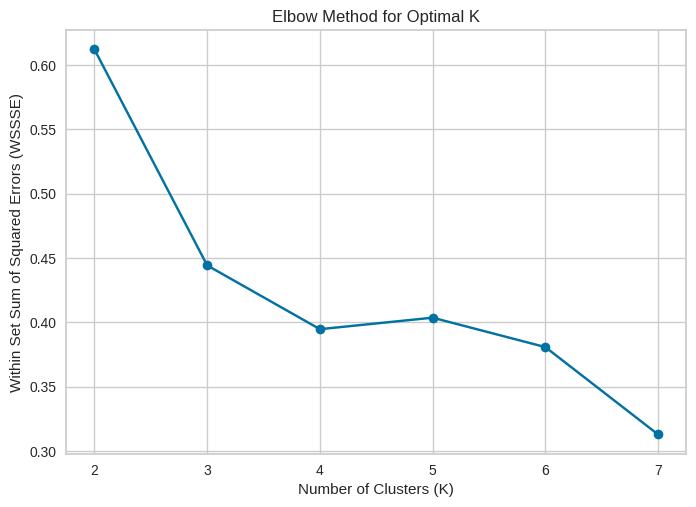

In [ ]:
# Plotting WSSSE values
plt.plot(range(2, 8), wssse_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


showing each cluster actual data in order to understand the different features of different clusters

In [ ]:
# from pyspark.ml.linalg import Vectors
# from pyspark.sql.functions import udf, col
# from pyspark.sql.types import FloatType

# # Assuming 'kmeansModel' is your trained KMeans model
# centroids = kmeansModel.clusterCenters()

# # Define a UDF to calculate the Euclidean distance between two vectors
# def euclidean_distance(a, b):
#     return float(Vectors.dense(a).squared_distance(Vectors.dense(b)))

# distance_udf = udf(euclidean_distance, FloatType())

# # Add a new column to 'customizedf' for the distance of each row to each centroid
# for i, centroid in enumerate(centroids):
#     customizedf = customizedf.withColumn(f'distance_to_centroid_{i}', distance_udf(col('features'), Vectors.dense(centroid)))

# # For each cluster, find the row with the minimum distance to the centroid
# closest_rows = []
# for i in range(len(centroids)):
#     closest_row = customizedf.orderBy(col(f'distance_to_centroid_{i}')).first()
#     closest_rows.append((i, closest_row))

# # Display the closest rows to each centroid
# for cluster, row in closest_rows:
#     print(f"Cluster {cluster}: Row closest to centroid: {row}")


PySparkTypeError: [NOT_COLUMN_OR_STR] Argument `col` should be a Column or str, got DenseVector.

In [ ]:

# Filter rows for a specific cluster, e.g., cluster 0
cluster_rows = predictDf.filter(col('prediction') == 0)

# Show the rows belonging to cluster 0
cluster_rows.show()


+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+-----------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+------------------+-----------------------+--------------------+------------+---------------+-----------------+------------------+----------------------+--------------------+--------------------+----------+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w

In [ ]:

# Filter rows for a specific cluster, e.g., cluster 0
cluster_rows = predictDf.filter(col('prediction') == 1)

# Show the rows belonging to cluster 0
cluster_rows.show()


+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+-----------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+------------------+-----------------------+--------------------+------------+---------------+-----------------+------------------+----------------------+--------------------+--------------------+----------+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w

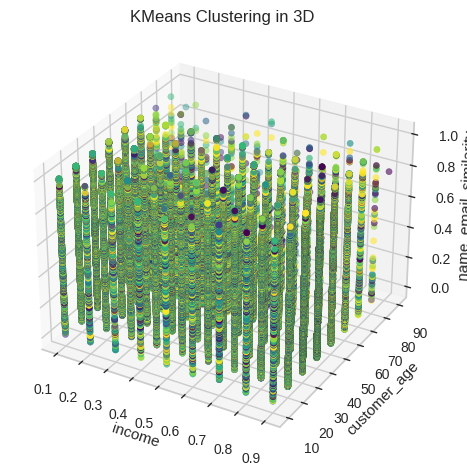

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
predictDf_pd = predictDf.toPandas()

# Assuming you have three features: income, customer_age, name_email_similarity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(predictDf_pd["income"], predictDf_pd["customer_age"], predictDf_pd["name_email_similarity"],
           c=predictDf_pd["prediction"], cmap='viridis')

ax.set_xlabel("income")
ax.set_ylabel("customer_age")
ax.set_zlabel("name_email_similarity")
ax.set_title('KMeans Clustering in 3D')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Features we want to plot
feature1 = "age"
feature2 = "income"

# Convert Spark DataFrame to Pandas DataFrame
customizedf_pd = customizedf.toPandas()

# Visualize the features
plt.scatter(customizedf_pd[feature1], customizedf_pd[feature2], c=customizedf_pd["housing_statusInt"], cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Scatter Plot of Age vs. Income")
plt.colorbar(label="Housing Status Index")
plt.show()


Py4JJavaError: An error occurred while calling o2784.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 963.0 failed 1 times, most recent failure: Lost task 1.0 in stage 963.0 (TID 1937) (b8311b005126 executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4148)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4145)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


###default values###

In [ ]:
# test the model with test data set
predictDf = kmeansModel.transform(testData)
predictDf.show(10)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictDf)
print("Silhouette with squared euclidean distance = " + str(silhouette))

NameError: name 'kmeansModel' is not defined

In [ ]:
print(customizedf.dtypes)

##Random Forest Algorithm##

###just analyzing test and train data(not applicable)###

In [ ]:
# Show the first 10 rows of X_train
y_train.show(10)
X_train.show(10)

+----------+
|fraud_bool|
+----------+
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
+----------+
only showing top 10 rows

+--------------------+
|            features|
+--------------------+
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[0,1,2,3,4,5,...|
|(33,[1,2,3,4,5,6,...|
+--------------------+
only showing top 10 rows



In [ ]:
print(y_train.dtypes)


[('fraud_bool', 'int')]


In [ ]:
# Check for missing values in X_train
print("\nMissing values in X_train:")
X_train.select([count(when(col(c).isNull(), c)).alias(c) for c in X_train.columns]).show()



Missing values in X_train:
+--------+
|features|
+--------+
|       0|
+--------+



###random forest from Implementation starts from here###

In [ ]:
columns_to_remove = ['features','Scaled_features']
filtered_columns = [col_name for col_name, col_type in customizedf.dtypes if col_type != 'string']

# Select columns excluding those to be removed and string columns
X = customizedf.select([col_name for col_name in filtered_columns if col_name not in columns_to_remove])

# Convert features into a single vector column
vector_assembler = VectorAssembler(inputCols=X.columns, outputCol="features")

# Select the 'fraud_bool' column
y = customizedf.select('fraud_bool')


In [ ]:
X.show(10)

+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------------+------------------+------------------+--------------------+--------------------------------+-----------------+-------------+----------------+------------------+-----------------+---------------+---------------------+---------------+-------------------------+------------------+-------------------------+------------------+-----+--------------------+-----------------+---------+------------+---------------+---------------+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|zip_count_4w|       velocity_6h|      velocity_24h|       velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|credit_risk_score|email_is_free|phone_home_valid|phone_mobile_valid|bank_months_count|has_other_cards|proposed_credit_l

In [ ]:
df.show(10)

+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+-----------------+------------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+
|fraud_bool|            income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|       velocity_6h|     velocity_24h|       velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status|credit_risk_score|email_is_free|housing_status|phone_home_valid|phone_mobile_valid|bank_months_

###applying random forest on just df without any extra features .###

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier




# Remove string columns and "fraud_bool" from the list of columns
feature_columns = [col for col, dtype in df.dtypes if dtype != "string" and col != "fraud_bool"]

# Assemble features
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = vector_assembler.transform(df)


# Split data into training and test sets
(rf_train_data, rf_test_data) = df.randomSplit([0.7, 0.3], seed=42)

# Define and train the Random Forest model
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="features")
rf_model = rf.fit(rf_train_data)

# Make predictions
rf_predictions = rf_model.transform(rf_test_data)

# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(rf_predictions)

print("Test Accuracy = %g" % (accuracy))


Test Accuracy = 0.777644


###applying data in customize data frame###

In [ ]:
# Assuming `df` is your DataFrame and `column_to_drop` is the name of the column you want to remove
customizedf = customizedf.drop("randomforestfeatures")


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier




# Remove string columns and "fraud_bool" from the list of columns
feature_columns = [col for col, dtype in df.dtypes if dtype != "string" and col != "fraud_bool" and col != "features" and col != "Scaled_features"]

# Assemble features
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="randomforestfeatures")
customizedf = vector_assembler.transform(customizedf)


# Split data into training and test sets
(rf_train_data, rf_test_data) = customizedf.randomSplit([0.7, 0.3], seed=42)

# Define and train the Random Forest model
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="randomforestfeatures", seed=42)
rf_model = rf.fit(rf_train_data)


# Get feature importances
importances = rf_model.featureImportances

# Print the feature importances
for i, importance in enumerate(importances):
    print(f'Feature {i}: Importance {importance}')
# Make predictions
rf_predictions = rf_model.transform(rf_test_data)

# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(rf_predictions)

print("Test Accuracy = %g" % (accuracy))


Feature 0: Importance 0.04588108174735883
Feature 1: Importance 0.05265329333380352
Feature 2: Importance 0.051767318585821856
Feature 3: Importance 0.03812496813864503
Feature 4: Importance 0.05369766951622734
Feature 5: Importance 0.0005195537948913828
Feature 6: Importance 0.04902780369283489
Feature 7: Importance 0.011697622411572317
Feature 8: Importance 0.016795029528886753
Feature 9: Importance 0.0013145917094596522
Feature 10: Importance 0.016127970969974766
Feature 11: Importance 0.018397118756639495
Feature 12: Importance 0.05397768040246921
Feature 13: Importance 0.1604948105974627
Feature 14: Importance 0.011547754142647615
Feature 15: Importance 0.008471409257755403
Feature 16: Importance 0.0
Feature 17: Importance 0.014843100888133537
Feature 18: Importance 0.010545188052540396
Feature 19: Importance 0.3267446972779266
Feature 20: Importance 0.0
Feature 21: Importance 0.001867261334986847
Feature 22: Importance 0.013748786078576145
Feature 23: Importance 0.041755289781385

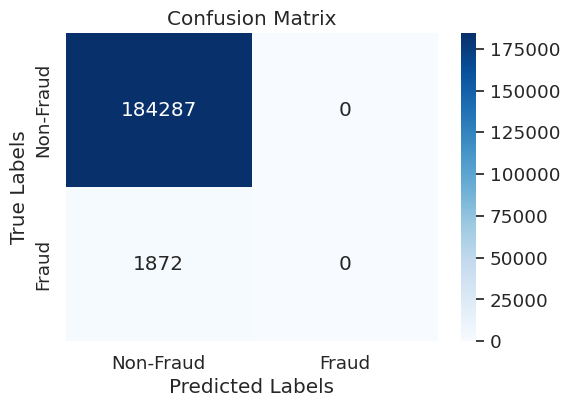

<ipython-input-156-3f8b860d3fc4>:26: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
<ipython-input-156-3f8b860d3fc4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette="viridis")


Precision:  nan
recall:  0.0
f1_score:  nan


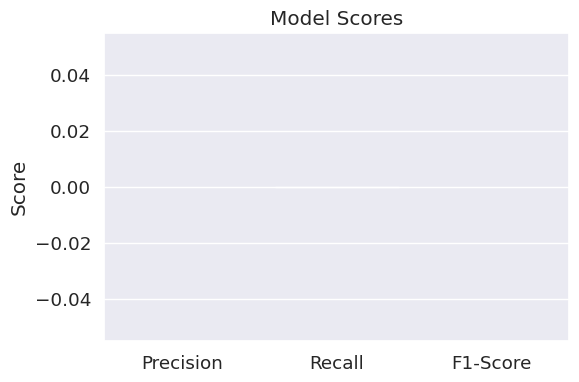

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
y_true = rf_predictions.select("fraud_bool").rdd.flatMap(lambda x: x).collect()
y_pred = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
labels = ["Non-Fraud", "Fraud"]
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, f1-score
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print('Precision: ',precision)
print('recall: ',recall)
print('f1_score: ',f1_score)
# Plot scores
labels = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1_score]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=scores, palette="viridis")
plt.title("Model Scores")
plt.ylabel("Score")
plt.show()


In [ ]:
print('tp:  ',tp)
#print('tn:  ',tn)
print('fp:  ',fp)
print('fn:  ',fn)
print('yt  ',y_true)
print('y_pred  ',y_pred)
customizedf.show(10)

tp:   0
fp:   0
fn:   1872
yt   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.functions import col

# Assuming 'rf_predictions' is your DataFrame containing model predictions
# Select the probability of the positive class
results = rf_predictions.select(['probability', 'fraud_bool'])

# Prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][1]), 1.0 if i[1] else 0.0) for i in results_collect]
predictionAndLabels = sc.parallelize(results_list)

# Instantiate metrics object
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

# Calculate confusion matrix
y_true = rf_predictions.select("fraud_bool").rdd.flatMap(lambda x: x).collect()
y_pred = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
cm = confusion_matrix(y_true, y_pred)

# Calculate precision, recall, f1-score
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Area under PR = 0.06918349502242783
Area under ROC = 0.7937096481315215
Precision: 0
Recall: 0.0
F1-Score: 0


###applying random foreset on sampled data ###

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Remove string columns and "fraud_bool" from the list of columns
feature_columns = [col for col, dtype in customizedf.dtypes if dtype != "string" and col != "fraud_bool" and col != "features" and col != "Scaled_features"]

# Assemble features
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="randomforestfeatures")
customizedf = vector_assembler.transform(customizedf)


# Split data into training and test sets
(rf_train_data, rf_test_data) = customizedf.randomSplit([0.7, 0.3], seed=42)


In [ ]:
# code block 1
from pyspark.sql.functions import col, explode, array, lit
import math  # Import the math module

major_df = rf_train_data.filter(col("fraud_bool") == 0)
minor_df = rf_train_data.filter(col("fraud_bool") == 1)
minor_count=minor_df.count()
major_count=major_df.count()
ratio = int(math.ceil(major_count/minor_count))
print("ratio: {}".format(ratio))

In [ ]:

print("major_count: {}".format(major_count))
print("minor_count: {}".format(minor_count))

major_count: 14636
minor_count: 0


In [ ]:
# from pyspark.sql.functions import approx_count_distinct

# # Correct usage: Specify the column name for which you want to get the approximate count distinct
# approx_major_count = major_df.agg(approx_count_distinct("fraud_bool").alias("fraud_bool")).collect()[0]["approx_count"]
# approx_minor_count = minor_df.agg(approx_count_distinct("fraud_bool").alias("fraud_bool")).collect()[0]["approx_count"]

# # Now you can calculate the ratio without using math.ceil, directly as a float for a double result
# ratio = float(approx_major_count) / float(approx_minor_count)


PySparkValueError: approx_count

###over sampling###

In [ ]:
a = range(ratio)
# duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows combined_df = major_df.unionAll(oversampled_df)
combined_df = major_df.unionAll(oversampled_df)
combined_df.show(10)
#print('new count: ',combined_df.count(),'  old count:  ',rf_train_data.count())
rf_train_data=combined_df
#print('final count:  ',rf_train_data.count())

###Under sampling  it doesn't work properly###

In [ ]:
# from pyspark.sql.functions import col, rand

# # Count the number of rows in the minority class
# minority_count = minor_df.count()

# # Sample the same number of rows from the majority class
# undersampled_major_df = major_df.sample(withReplacement=False, fraction=minority_count / major_df.count(), seed=42)

# # Combine the undersampled majority class with the minority class
# undersampled_df = undersampled_major_df.unionAll(minor_df)

# # Shuffle the combined DataFrame to randomize the order of rows
# undersampled_df = undersampled_df.orderBy(rand())

# # Show the undersampled DataFrame
# undersampled_df.show(10)

# # Print the count of the undersampled DataFrame
# print("New count after undersampling: ", undersampled_df.count())

# # Assign the undersampled DataFrame to rf_train_data
# rf_train_data = undersampled_df


+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+------------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+-----------+------------+----------------+------------------+-----------------------+--------------------+------------+---------------+-----------------+------------------+----------------------+--------------------+
|fraud_bool|            income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|      

###running random forest on sampling result ###

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier



# Define and train the Random Forest model
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="randomforestfeatures", seed=42)
rf_model = rf.fit(rf_train_data)


# Get feature importances
importances = rf_model.featureImportances

# Print the feature importances
for i, importance in enumerate(importances):
    print(f'Feature {i}: Importance {importance}')
# Make predictions
rf_predictions = rf_model.transform(rf_test_data)

# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(rf_predictions)

print("Test Accuracy = %g" % (accuracy))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
y_true = rf_predictions.select("fraud_bool").rdd.flatMap(lambda x: x).collect()
y_pred = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
labels = ["Non-Fraud", "Fraud"]
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, f1-score
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print('Precision: ',precision)
print('recall: ',recall)
print('f1_score: ',f1_score)
# Plot scores
labels = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1_score]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=scores, palette="viridis")
plt.title("Model Scores")
plt.ylabel("Score")
plt.show()


###changing code threshold after sampling ###

In [ ]:
# Importing necessary libraries
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define and train the Random Forest model
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="randomforestfeatures", seed=42)
rf_model = rf.fit(rf_train_data)

# Make predictions
rf_predictions = rf_model.transform(rf_test_data)

# Evaluate the model with different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]  # Example thresholds to try
for threshold in thresholds:
    evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool", metricName="areaUnderPR")
    precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "areaUnderPR", evaluator.metricLabel: 1.0})
    print(f"Precision with threshold {threshold} = {precision}")


###adding class weight to see the result ###

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define class weights
class_weights = {0: 1.0, 1: 10.0}  # Example weights for the two classes, adjust as needed

# Define and train the Random Forest model
rf = RandomForestClassifier(labelCol="fraud_bool",
                             featuresCol="randomforestfeatures",
                             seed=42)
rf_model = rf.fit(rf_train_data)

# Specify class weights in the trained model
rf_model = rf_model.setWeightCol("classWeights")

# Make predictions
rf_predictions = rf_model.transform(rf_test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(rf_predictions)

print("Test Accuracy = %g" % (accuracy))


AttributeError: 'RandomForestClassificationModel' object has no attribute 'setWeightCol'

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when

# Create a column for class weights
class_weights = {0: 1.0, 1: 10.0}  # Adjust weights as needed

# Add weights column based on the target variable
rf_train_data = rf_train_data.withColumn("weight", when(rf_train_data["fraud_bool"] == 1, class_weights[1]).otherwise(class_weights[0]))

# Define RandomForestClassifier with weight column
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="randomforestfeatures", weightCol="weight", seed=42)

# Train the RandomForestClassifier
rf_model = rf.fit(rf_train_data)

# Make predictions
rf_predictions = rf_model.transform(rf_test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(rf_predictions)

print("Test Accuracy = %g" % (accuracy))


###cross validation for checking best performace ###

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define the feature assembler
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define the RandomForestClassifier
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="features", seed=42)

# Define the parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Define the cross-validator
cross_validator = CrossValidator(estimator=rf,
                                 estimatorParamMaps=param_grid,
                                 evaluator=BinaryClassificationEvaluator(labelCol="fraud_bool"),
                                 numFolds=5,
                                 seed=42)

# Run cross-validation
cv_model = cross_validator.fit(rf_train_data)

# Make predictions on the test data
rf_predictions = cv_model.transform(rf_test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(rf_predictions)

print("Test Accuracy = %g" % (accuracy))


###random forest with parameter tuning###

Best Model Test Accuracy = 0.840151


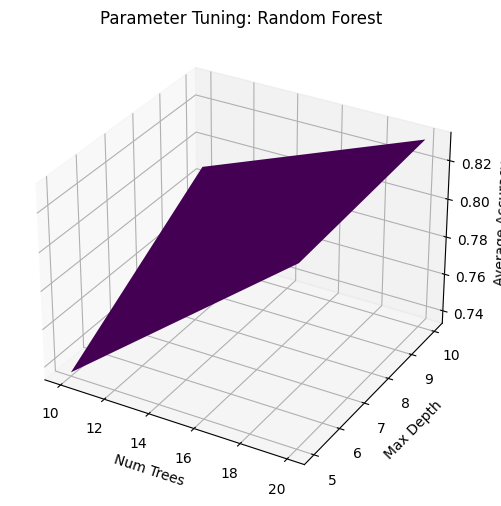

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import numpy as np
import matplotlib.pyplot as plt

# Remove string columns and "fraud_bool" from the list of columns
feature_columns = [col for col, dtype in df.dtypes if dtype != "string" and col != "fraud_bool" and col != "features" and col != "Scaled_features"]

# Assemble features
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="randomforestfeatures")
customizedf = vector_assembler.transform(customizedf)

# Split data into training and test sets
(train_data, test_data) = customizedf.randomSplit([0.7, 0.3], seed=42)

# Define RandomForestClassifier
rf = RandomForestClassifier(labelCol="fraud_bool", featuresCol="randomforestfeatures")

# Define evaluator
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")


param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Create CrossValidator with increased parallelism for faster execution
cross_val = CrossValidator(estimator=rf,
                           estimatorParamMaps=param_grid,
                           evaluator=evaluator,
                           numFolds=5,  # 5-fold cross-validation
                           parallelism=4)  # Increase parallelism

# Fit CrossValidator
cv_model = cross_val.fit(train_data)

# Get best model from CrossValidator
best_model = cv_model.bestModel

# Make predictions
rf_predictions = best_model.transform(test_data)

# Evaluate best model
accuracy = evaluator.evaluate(rf_predictions)

print("Best Model Test Accuracy = %g" % (accuracy))

# Extract param values for plotting
param_values = cv_model.avgMetrics
num_trees_values = [10, 20]
max_depth_values = [5, 10]

# Create meshgrid for plotting
X, Y = np.meshgrid(num_trees_values, max_depth_values)
Z = np.array(param_values).reshape(X.shape)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Num Trees')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Average Accuracy')
ax.set_title('Parameter Tuning: Random Forest')
plt.show()


##Logistic Regression##

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

# Remove string columns and "fraud_bool" from the list of columns
feature_columns = [col for col, dtype in df.dtypes if dtype != "string" and col != "fraud_bool" and col != "features" and col != "Scaled_features"]

# Assemble features
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="logreg_features")
customizedf = vector_assembler.transform(customizedf)

In [ ]:


balance_ratio = customizedf.filter(df['fraud_bool'] == 0).count() / df.count()

# Add a new column for weights
customizedf = customizedf.withColumn('classWeight', when(customizedf['fraud_bool'] == 1, balance_ratio).otherwise(1-balance_ratio))

# Split data into training and test sets
(train_data, test_data) = customizedf.randomSplit([0.7, 0.3], seed=42)

# Define and train the Logistic Regression model
lr = LogisticRegression(labelCol="fraud_bool", featuresCol="Scaled_features"
# ,weightCol='classWeight' this feature reduced precision 25 percent
)
lr_model = lr.fit(train_data)

# Make predictions
lr_predictions = lr_model.transform(test_data)

# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(lr_predictions)

print("Test Accuracy = %g" % (accuracy))


Test Accuracy = 0.826588


Exception ignored in: <function JavaWrapper.__del__ at 0x7da537d68280>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'LogisticRegression' object has no attribute '_java_obj'


Test Accuracy = 0.826588
Precision = 0.25
Recall = 0.003205128205128205
F1-Score = 0.006329113924050633


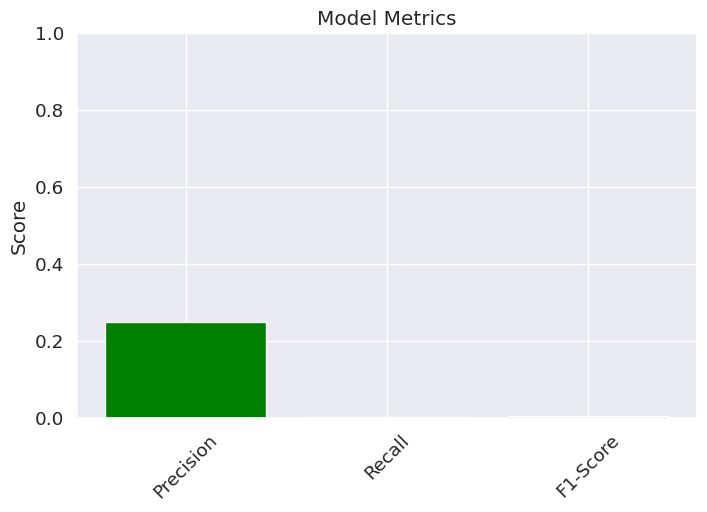

In [ ]:

# Calculate F1-score, recall, and precision
tp = lr_predictions.filter("prediction = 1 AND fraud_bool = 1").count()
fp = lr_predictions.filter("prediction = 1 AND fraud_bool = 0").count()
tn = lr_predictions.filter("prediction = 0 AND fraud_bool = 0").count()
fn = lr_predictions.filter("prediction = 0 AND fraud_bool = 1").count()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print("Test Accuracy = %g" % (accuracy))
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1_score)

# Plotting
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='green')
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

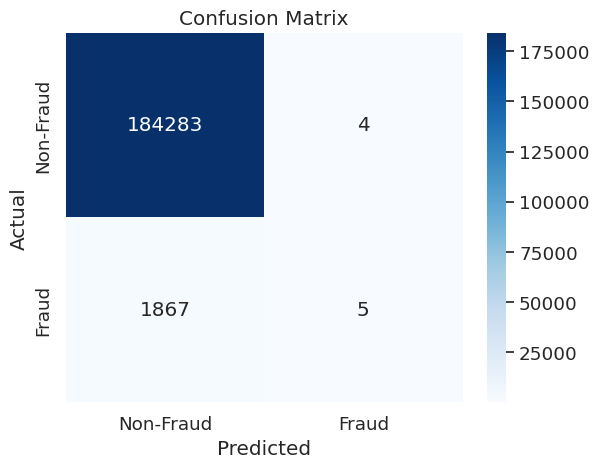

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
y_true = lr_predictions.select("fraud_bool").rdd.flatMap(lambda x: x).collect()
y_pred = lr_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
cm = confusion_matrix(y_true, y_pred)

# Plotting Confusion Matrix
labels = ['Non-Fraud', 'Fraud']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression Tuning

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


# Define the Logistic Regression model
lr = LogisticRegression(labelCol="fraud_bool", featuresCol="Scaled_features")

# Define the parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(lr.maxIter, [10, 20, 30]) \
    .addGrid(lr.regParam, [0.01, 0.1, 0.3]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")

# Create a CrossValidator
cross_val = CrossValidator(estimator=lr,
                           estimatorParamMaps=param_grid,
                           evaluator=evaluator,
                           numFolds=5)

# Run cross-validation, and choose the best set of parameters
cv_model = cross_val.fit(train_data)

# Make predictions on test data
lr_predictions = cv_model.transform(test_data)

# Evaluate the model
accuracy = evaluator.evaluate(lr_predictions)
print("Test Accuracy = %g" % (accuracy))

# Best model from Cross Validation
best_lr_model = cv_model.bestModel

# Print the best parameters
print("Best maxIter:", best_lr_model.getMaxIter())
print("Best regParam:", best_lr_model.getRegParam())
print("Best elasticNetParam:", best_lr_model.getElasticNetParam())


Test Accuracy = 1
Best maxIter: 10
Best regParam: 0.01
Best elasticNetParam: 0.5


Test Accuracy = 1
Precision = 1.0
Recall = 1.0
F1-Score = 1.0


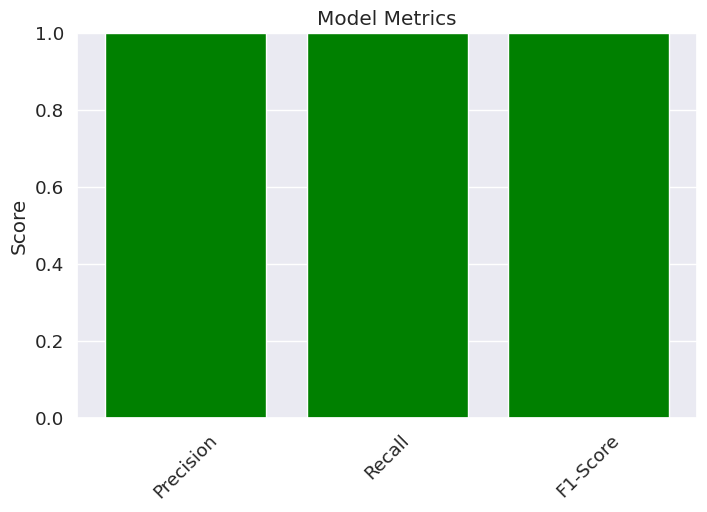

In [ ]:

# Calculate F1-score, recall, and precision
tp = lr_predictions.filter("prediction = 1 AND fraud_bool = 1").count()
fp = lr_predictions.filter("prediction = 1 AND fraud_bool = 0").count()
tn = lr_predictions.filter("prediction = 0 AND fraud_bool = 0").count()
fn = lr_predictions.filter("prediction = 0 AND fraud_bool = 1").count()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print("Test Accuracy = %g" % (accuracy))
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1_score)

# Plotting
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='green')
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('tp:  ',tp)
#print('tn:  ',tn)
print('fp:  ',fp)
print('fn:  ',fn)
print('yt  ',y_true)
print('y_pred  ',y_pred)
customizedf.show(10)

tp:   0
fp:   0
fn:   1872
yt   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

depicting results (Roc)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

# Get the probabilities and labels for the test data
probs = lr_predictions.select("probability").rdd.map(lambda x: x[0][1]).collect()
labels = lr_predictions.select("fraud_bool").rdd.flatMap(lambda x: x).collect()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


##SVM##

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# # Assuming 'customizedf' contains your feature vectors in a column named 'features' and labels in a column named 'fraud_bool'
# # VectorAssembler to combine features into a single vector column
# vector_assembler = VectorAssembler(inputCols=customizedf.columns[:-1], outputCol="features")
# data = vector_assembler.transform(customizedf)

# # Split data into training and test sets
# (trainingData, testData) = data.randomSplit([0.7, 0.3], seed=42)

# Define and train the SVM model
svm = LinearSVC(labelCol="fraud_bool", featuresCol="features", maxIter=10, regParam=0.1)
svm_model = svm.fit(trainingData)

# Make predictions
svm_predictions = svm_model.transform(testData)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="fraud_bool")
accuracy = evaluator.evaluate(svm_predictions)

print("Test Accuracy = %g" % (accuracy))


---
# **Task 3 - Model Parameter Tuning (20 marks)**
---

---
# **Task 4 - Model Evaluation and Accuracy Calculation (20 marks)**
---

---
# **Task 5 - Results Visualization or Printing (5 marks)**
---

---
# **Task 6 - LSEP Considerations (5 marks)**
---

Transparency: in general means that local services should be easy to access and understand by the public people, also it should inform general consensus about the project and engage them. Moreover, this sort of engagement would increase trust in the community and enhance local awareness in society. Although, it has some negative effects such as misunderstanding or confusion. In the transparency rule, it is very essential to monitor and design processes in the best way and ensure that everything is clear and avoid ambiguity.